In [15]:
#Import required modules
from sklearn.decomposition import PCA
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pickle
import matplotlib.cm as cm
from sklearn.preprocessing import minmax_scale
from tqdm import tqdm 
import copyreg

In [16]:
# explicit function to normalize array
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

In [215]:
df = pd.read_pickle('data/SCUT-FBP5500_v2/df/ml_df_0.pkl')

In [32]:
df.columns

Index(['Filename', 'Orig_img', 'landmarks', 'orb_kp', 'orb_dec', 'Gabor1',
       'Gabor2', 'Gabor3', 'Gabor4', 'Gabor5', 'Gabor6', 'Gabor7', 'Gabor8',
       'Gabor9', 'Gabor10', 'Gabor11', 'Gabor12', 'Gabor13', 'Gabor14',
       'Gabor15', 'Gabor16', 'Gabor17', 'Gabor18', 'Gabor19', 'Gabor20',
       'Gabor21', 'Gabor22', 'Gabor23', 'Gabor24', 'Gabor25', 'Gabor26',
       'Gabor27', 'Gabor28', 'Gabor29', 'Gabor30', 'Gabor31', 'Gabor32',
       'Canny Edge', 'Roberts', 'Sobel', 'Scharr', 'Prewitt', 'Gaussian s3',
       'Gaussian s7', 'Median s3', 'Variance s3', 'asian', 'male'],
      dtype='object')

In [216]:
smpl = df.head(1)

In [34]:
#smpl[coi].iloc[0,:]
for v in smpl[coi].iloc[0,:].values:
    print(v.shape)

(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)


In [35]:
# reducing from 
# these arrays are 122500
coi = ['Gabor1','Gabor2', 'Gabor3', 'Gabor4', 'Gabor5', 'Gabor6', 'Gabor7', 'Gabor8',
       'Gabor9', 'Gabor10', 'Gabor11', 'Gabor12', 'Gabor13', 'Gabor14',
       'Gabor15', 'Gabor16', 'Gabor17', 'Gabor18', 'Gabor19', 'Gabor20',
       'Gabor21', 'Gabor22', 'Gabor23', 'Gabor24', 'Gabor25', 'Gabor26',
       'Gabor27', 'Gabor28', 'Gabor29', 'Gabor30', 'Gabor31', 'Gabor32',]

# these arrays are 350 x350
coi2 = ['Canny Edge', 'Roberts', 'Sobel', 'Scharr', 'Prewitt', 'Gaussian s3',
       'Gaussian s7', 'Median s3', 'Variance s3']

In [38]:
pca_coi_mat = np.hstack(smpl[coi].iloc[0,:].values)
scaled_pca = minmax_scale(pca_coi_mat)

In [39]:
# normalize all values for centering before pca
# Normalization is important in PCA since it is a variance maximizing exercise
norm_pca = normalize_2d(pca_coi_mat)

# First we are going to test reducing our gabor filters
## the concept here is a form of pooling representations

In [40]:
pca = PCA() # first let's see how much variance and so keep all of them
converted_data = pca.fit_transform(norm_pca)

In [41]:
# so this makes it apparent we can reduce down to 2 components
np.round(pca.explained_variance_ratio_,3)

array([0.855, 0.098, 0.024, 0.009, 0.007, 0.002, 0.002, 0.001, 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   ])

In [78]:
pca2 = PCA(2) # first let's see how much variance and so keep all of them
converted_data2 = pca2.fit_transform(norm_pca)

In [43]:
pca3 = PCA(2) # first let's see how much variance and so keep all of them
converted_data3= pca3.fit_transform(pca_coi_mat)

In [44]:
# not normalized
# re ran the above switching out the variable fitted
pca3.components_

array([[-2.21632977e-29, -9.22315489e-30, -1.61214426e-01,
        -2.92136028e-01, -3.77028982e-01, -3.66056413e-01,
        -2.67617054e-01, -1.48287413e-01, -1.29615364e-35,
         2.58730770e-35, -2.37057185e-01, -2.57173962e-01,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -2.05398012e-02, -9.76446330e-02, -2.30874249e-01,
        -3.34182869e-03, -3.42851764e-01, -1.48518563e-01,
        -0.00000000e+00, -0.00000000e+00, -5.64131534e-02,
        -9.19867270e-02, -1.79542810e-01, -9.48301056e-02,
        -3.22313625e-01, -1.92202275e-01],
       [ 3.24205759e-22,  1.35019425e-22, -3.62855021e-01,
        -2.71632958e-01,  4.12241124e-03,  2.87484231e-01,
         2.13367339e-01,  1.16617742e-01, -7.47751838e-36,
         1.08123634e-34, -3.46180330e-01, -3.23792856e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.50

In [45]:
# normalized
pca2.components_

array([[-6.45520818e-25, -1.12142613e-32, -1.61214426e-01,
        -2.92136028e-01, -3.77028982e-01, -3.66056413e-01,
        -2.67617054e-01, -1.48287413e-01, -4.34891037e-34,
         8.10442834e-36, -2.37057185e-01, -2.57173962e-01,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -2.05398012e-02, -9.76446330e-02, -2.30874249e-01,
        -3.34182869e-03, -3.42851764e-01, -1.48518563e-01,
        -0.00000000e+00, -0.00000000e+00, -5.64131534e-02,
        -9.19867270e-02, -1.79542810e-01, -9.48301056e-02,
        -3.22313625e-01, -1.92202275e-01],
       [ 2.77538694e-17, -9.53349207e-25, -3.62855021e-01,
        -2.71632958e-01,  4.12241124e-03,  2.87484231e-01,
         2.13367339e-01,  1.16617742e-01, -9.03675311e-34,
        -1.88389362e-35, -3.46180330e-01, -3.23792856e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.50

# Reshape the data (350 x 350 ) so we can plot the component in it's image representation

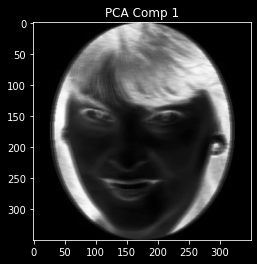

In [100]:
# let's see about reshaping this back into 350 by 350 
c1_orig = converted_data2[:,0].reshape(350,350)
plt.title('PCA Comp 1')
plt.imshow(c1_orig, cmap = cm.Greys_r, origin='upper')

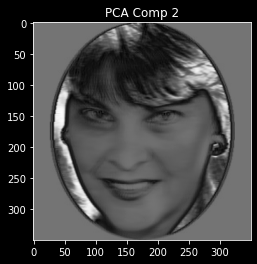

In [101]:
c2_orig = converted_data2[:,1].reshape(350,350)
plt.title('PCA Comp 2')
plt.imshow(c2_orig, cmap = cm.Greys_r, origin='upper')

# Next we are going to test the edge filters

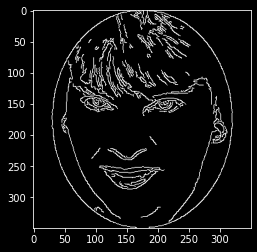

In [102]:
# for reference this is what we are looking at
plt.imshow(smpl[coi2].iloc[0,0], cmap = cm.Greys_r, origin='upper')

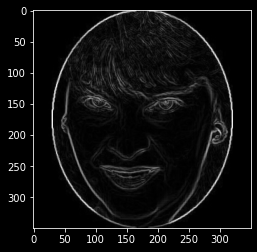

In [103]:
plt.imshow(smpl[coi2].iloc[0,3], cmap = cm.Greys_r, origin='upper')

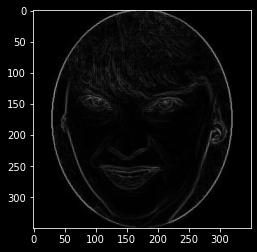

In [104]:
plt.imshow(smpl[coi2].iloc[0,1], cmap = cm.Greys_r, origin='upper')

In [135]:
# applying and transforming doesn't work for df but does for series
#smpl[coi2].transform(lambda x: x.reshape(-1,1), axis=1)\


In [136]:
pca_coi2_mat = np.hstack(smpl[coi2].iloc[0,:].apply(lambda x: x.reshape(-1,1)))

# again normalizing the data
norm_coi2_pca = normalize_2d(pca_coi2_mat)

pca_coi2 = PCA() # first let's see how much variance and so keep all of them
converted_data = pca_coi2.fit_transform(norm_coi2_pca)
np.round(pca_coi2.explained_variance_ratio_,3)

array([0.775, 0.153, 0.06 , 0.011, 0.001, 0.   , 0.   , 0.   , 0.   ])

## Looks like 2 components is enough

In [137]:
pca_coi2_mat = np.hstack(smpl[coi2].iloc[0,:].apply(lambda x: x.reshape(-1,1)))

# again normalizing the data
norm_coi2_pca = normalize_2d(pca_coi2_mat)

pca_coi2_c2 = PCA(2) # first let's see how much variance and so keep all of them
converted_data_c2 = pca_coi2_c2.fit_transform(norm_coi2_pca)

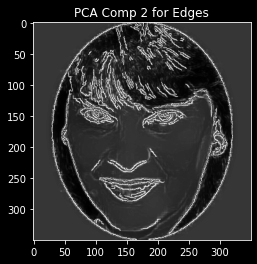

In [139]:
coi2_c1_orig = converted_data_c2[:,1].reshape(350,350)
plt.title('PCA Comp 2 for Edges')
plt.imshow(coi2_c1_orig, cmap = cm.Greys_r, origin='upper')

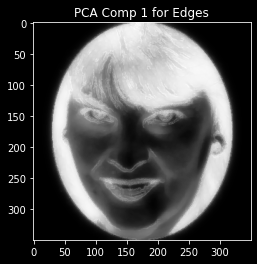

In [140]:
coi2_c2_orig = converted_data_c2[:,0].reshape(350,350)
plt.title('PCA Comp 1 for Edges')
plt.imshow(coi2_c2_orig, cmap = cm.Greys_r, origin='upper')

# Let's explore merging all the filters into 2 components

In [222]:
# do this columnwise transformation on misshaped columns
# smpl.Roberts.apply(lambda x: x.reshape(-1,1))

for col in coi2:
    smpl[col] = smpl[col].apply(lambda x: x.reshape(-1,1))
    
# Let's check to see (last columns were changed -9:-2)
smpl.iloc[0,-9:-2]

(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [231]:
pca_all = np.hstack(smpl.iloc[0,5:-2])

# again normalizing the data
norm_pca_all = normalize_2d(pca_all)

pca_ = PCA(2) # first let's see how much variance and so keep all of them
converted_all = pca_.fit_transform(norm_pca_all)

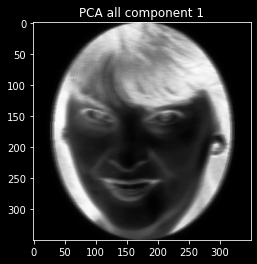

In [233]:
all_c1_orig = converted_all[:,0].reshape(350,350)
plt.title('PCA all component 1')
plt.imshow(all_c1_orig, cmap = cm.Greys_r, origin='upper')

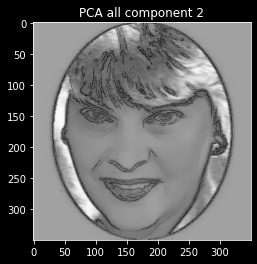

In [260]:
all_c2_orig = converted_all[:,1].reshape(350,350)
plt.title('PCA all component 2')
plt.imshow(all_c2_orig, cmap = cm.Greys_r, origin='upper')

# It appear we can reduce the filters into 2 components that preserve the filter information
## Let's compare this to doing this directly on the image itself

In [236]:
filename = smpl.Filename[0]
img = cv2.cvtColor(cv2.imread('data/SCUT-FBP5500_v2'+ '/Images/'+ filename), cv2.COLOR_BGR2GRAY) 

In [248]:
img.shape

(350, 350)

In [249]:
direct_pca = PCA(27) # first let's see how much variance and so keep all of them
converted_direct = direct_pca.fit_transform(normalize_2d(img))

In [252]:
np.round(direct_pca.explained_variance_ratio_,3)

array([0.369, 0.228, 0.145, 0.083, 0.039, 0.023, 0.014, 0.012, 0.01 ,
       0.009, 0.009, 0.006, 0.005, 0.004, 0.004, 0.003, 0.003, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [254]:
# it seems 27 component will do the trick here in grayscale
direct_pca_27 = PCA(27) # first let's see how much variance and so keep all of them
converted_direct_27 = direct_pca_27.fit_transform(normalize_2d(img))

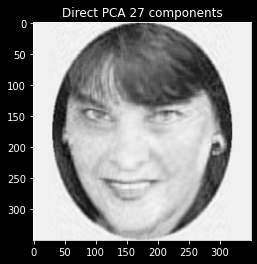

In [258]:
plt.title('Direct PCA 27 components')
plt.imshow(direct_pca_27.inverse_transform(converted_direct_27), cmap = cm.Greys_r, origin='upper')

# Now we will reduce our dataframes that were 36 gb in total size with all the filter data

In [17]:
def dim_reduce(path):
    """
    Take in pickled data frame path and reduce the dimensions
    
    Returns reduced df for exporting
    """
    df_reduced = pd.DataFrame()
    
    pca_columns = ['Gabor1', 'Gabor2', 'Gabor3', 'Gabor4', 'Gabor5', 'Gabor6', 'Gabor7',
       'Gabor8', 'Gabor9', 'Gabor10', 'Gabor11', 'Gabor12', 'Gabor13',
       'Gabor14', 'Gabor15', 'Gabor16', 'Gabor17', 'Gabor18', 'Gabor19',
       'Gabor20', 'Gabor21', 'Gabor22', 'Gabor23', 'Gabor24', 'Gabor25',
       'Gabor26', 'Gabor27', 'Gabor28', 'Gabor29', 'Gabor30', 'Gabor31',
       'Gabor32', 'Canny Edge', 'Roberts', 'Sobel', 'Scharr', 'Prewitt',
       'Gaussian s3', 'Gaussian s7', 'Median s3', 'Variance s3']
    
    # read in pickled data
    df = pd.read_pickle(path)
    # first column-wise reshaping of edge filters
    for col in ['Canny Edge', 'Roberts', 'Sobel', 'Scharr', 'Prewitt',
    'Gaussian s3', 'Gaussian s7', 'Median s3', 'Variance s3']:
        df[col] = df[col].apply(lambda x: x.reshape(-1,1))
    
    # next row-wise operation for PCA
    for ix, row in df.iterrows():
        
        # we have to create a tmp df to assign arrays
        # pandas will try to assign the array columnwise otherwise
        tmp = pd.DataFrame()
        tmp['Filename'] = [row['Filename']]
        tmp['orb_kp'] = [row['orb_kp']]
        tmp['orb_dec'] = [row['orb_dec']]
        
        # Gender & Race encoding - since it didn't work the first time
        if row[0][1] == 'M' :
            #df.at[ix,'male'] = 1
            tmp['male'] = 1
        if row[0][0] == 'A':
            #df.at[ix,'asian'] = 1
            tmp['asian'] = 1
        
        pca_all = np.hstack(row[pca_columns])

        # again normalizing the data
        norm_pca_all = normalize_2d(pca_all)

        pca_ = PCA(2) 
        converted_all = pca_.fit_transform(norm_pca_all)
        tmp['PCA_1'] = [converted_all[:,0]]
        tmp['PCA_2'] = [converted_all[:,1]]
        
        #df.at[ix, 'PCA_1'] = converted_all[:,0]
        #df.at[ix, 'PCA_2'] = converted_all[:,1]
            
        df_reduced = pd.concat([df_reduced, tmp])
        
    return df_reduced
    

In [18]:
# How many elements each 
# list should have 
n = 3
p = 'data/SCUT-FBP5500_v2/df/'
fl = os.listdir(p)
fl.remove('.DS_Store')   
# using list comprehension 
batches = [fl[i:i + n] for i in range(0, len(fl), n)] 

def _pickle_keypoints(point):
    return cv2.KeyPoint, (*point.pt, point.size, point.angle,
                          point.response, point.octave, point.class_id)
 
# fix it once    
copyreg.pickle(cv2.KeyPoint().__class__, _pickle_keypoints) 

In [19]:
for i, batch in enumerate(batches):
    
    print(f'working on batch {i} of {len(batches)}')
    tmp = pd.DataFrame()
    
    for ix,f in tqdm(enumerate(batch)):
            print(f'Trying {f}')
            tr = dim_reduce(p + f)
            tmp = pd.concat([tmp, tr])  
            
    with open(f"data/SCUT-FBP5500_v2/reduced/ml_df_reduced{i}.pkl","wb") as p_dump:
            pickle.dump(tmp, p_dump)        
                  
    print(f'done with batch {i}')

working on batch 0 of 19


0it [00:00, ?it/s]

Trying ml_df_49.pkl


1it [01:02, 62.08s/it]

Trying ml_df_48.pkl


2it [02:19, 70.87s/it]

Trying ml_df_15.pkl


3it [03:21, 67.09s/it]


done with batch 0
working on batch 1 of 19


0it [00:00, ?it/s]

Trying ml_df_29.pkl


1it [00:54, 54.91s/it]

Trying ml_df_1.pkl


2it [01:47, 53.72s/it]

Trying ml_df_0.pkl


3it [02:40, 53.52s/it]


done with batch 1
working on batch 2 of 19


0it [00:00, ?it/s]

Trying ml_df_28.pkl


1it [00:53, 53.03s/it]

Trying ml_df_14.pkl


2it [01:45, 52.71s/it]

Trying ml_df_16.pkl


3it [02:38, 52.98s/it]


done with batch 2
working on batch 3 of 19


0it [00:00, ?it/s]

Trying ml_df_2.pkl


1it [00:53, 53.53s/it]

Trying ml_df_3.pkl


2it [01:45, 52.56s/it]

Trying ml_df_17.pkl


3it [02:37, 52.55s/it]


done with batch 3
working on batch 4 of 19


0it [00:00, ?it/s]

Trying ml_df_13.pkl


1it [00:52, 52.81s/it]

Trying ml_df_7.pkl


2it [01:45, 52.58s/it]

Trying ml_df_6.pkl


3it [02:37, 52.46s/it]


done with batch 4
working on batch 5 of 19


0it [00:00, ?it/s]

Trying ml_df_12.pkl


1it [00:53, 53.02s/it]

Trying ml_df_38.pkl


2it [01:45, 52.74s/it]

Trying ml_df_10.pkl


3it [02:38, 52.71s/it]


done with batch 5
working on batch 6 of 19


0it [00:00, ?it/s]

Trying ml_df_4.pkl


1it [00:53, 53.28s/it]

Trying ml_df_5.pkl


2it [01:45, 52.76s/it]

Trying ml_df_11.pkl


3it [02:38, 52.94s/it]


done with batch 6
working on batch 7 of 19


0it [00:00, ?it/s]

Trying ml_df_39.pkl


1it [00:52, 52.85s/it]

Trying ml_df_34.pkl


2it [01:45, 52.62s/it]

Trying ml_df_20.pkl


3it [02:37, 52.53s/it]


done with batch 7
working on batch 8 of 19


0it [00:00, ?it/s]

Trying ml_df_8.pkl


1it [00:52, 52.88s/it]

Trying ml_df_9.pkl


2it [01:45, 52.53s/it]

Trying ml_df_21.pkl


3it [02:37, 52.65s/it]


done with batch 8
working on batch 9 of 19


0it [00:00, ?it/s]

Trying ml_df_35.pkl


1it [00:52, 52.67s/it]

Trying ml_df_23.pkl


2it [01:45, 52.83s/it]

Trying ml_df_37.pkl


3it [02:37, 52.54s/it]


done with batch 9
working on batch 10 of 19


0it [00:00, ?it/s]

Trying ml_df_36.pkl


1it [00:52, 52.69s/it]

Trying ml_df_22.pkl


2it [01:46, 53.41s/it]

Trying ml_df_26.pkl


3it [02:39, 53.26s/it]


done with batch 10
working on batch 11 of 19


0it [00:00, ?it/s]

Trying ml_df_32.pkl


1it [01:02, 62.95s/it]

Trying ml_df_33.pkl


2it [01:58, 58.64s/it]

Trying ml_df_27.pkl


3it [02:53, 57.82s/it]


done with batch 11
working on batch 12 of 19


0it [00:00, ?it/s]

Trying ml_df_19.pkl


1it [00:55, 55.01s/it]

Trying ml_df_31.pkl


2it [01:49, 54.98s/it]

Trying ml_df_25.pkl


3it [02:45, 55.14s/it]


done with batch 12
working on batch 13 of 19


0it [00:00, ?it/s]

Trying ml_df_24.pkl


1it [00:57, 57.05s/it]

Trying ml_df_30.pkl


2it [01:51, 55.61s/it]

Trying ml_df_18.pkl


3it [02:46, 55.43s/it]


done with batch 13
working on batch 14 of 19


0it [00:00, ?it/s]

Trying ml_df_43.pkl


1it [00:55, 55.92s/it]

Trying ml_df_42.pkl


2it [01:49, 54.73s/it]

Trying ml_df_40.pkl


3it [02:43, 54.53s/it]


done with batch 14
working on batch 15 of 19


0it [00:00, ?it/s]

Trying ml_df_54.pkl


1it [00:54, 54.94s/it]

Trying ml_df_55.pkl


2it [00:55, 23.00s/it]

Trying ml_df_41.pkl


3it [01:50, 36.73s/it]


done with batch 15
working on batch 16 of 19


0it [00:00, ?it/s]

Trying ml_df_45.pkl


1it [00:54, 54.98s/it]

Trying ml_df_51.pkl


2it [01:49, 54.42s/it]

Trying ml_df_50.pkl


3it [02:43, 54.35s/it]


done with batch 16
working on batch 17 of 19


0it [00:00, ?it/s]

Trying ml_df_44.pkl


1it [00:54, 54.86s/it]

Trying ml_df_52.pkl


2it [01:48, 54.26s/it]

Trying ml_df_46.pkl


3it [02:47, 55.99s/it]


done with batch 17
working on batch 18 of 19


0it [00:00, ?it/s]

Trying ml_df_47.pkl


1it [00:58, 58.43s/it]

Trying ml_df_53.pkl


2it [01:56, 58.21s/it]


done with batch 18


# Went from 36gb down to 10 gb for the whole set.
